In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from itertools import chain
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(first_date)


2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(data=year_prcp).set_index('date')
year_prcp_df = year_prcp_df.rename(columns={'prcp': 'precipitation'})
year_prcp_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [14]:

# Sort the dataframe by date
df = year_prcp_df.sort_values('date')
df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


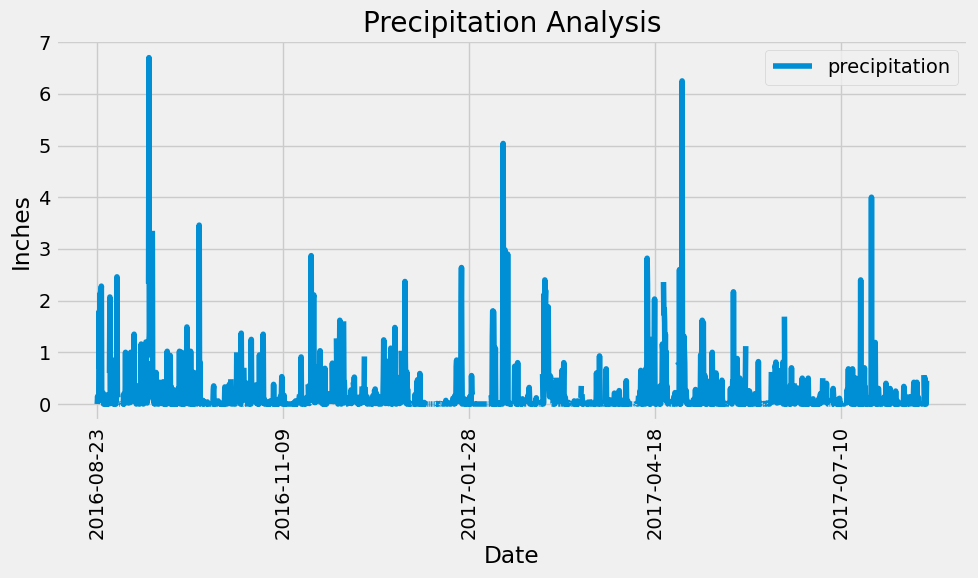

In [15]:

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (10,6))
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station).filter(Station.id).count()
print(number_stations ,"stations are available in this dataset.")

9 stations are available in this dataset.


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
activest_station = stations[0][0]
print("The most active station is ",activest_station,".")

The most active station is  USC00519281 .


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print("The lowest temperature recorded for station 'USC00519281' is ",lowest_temperature)
print("The highest temperature recorded for station 'USC00519281' is ",highest_temperature)
print("The average temperature recorded for station 'USC00519281' is ",average_temperature)

The lowest temperature recorded for station 'USC00519281' is  [(54.0,)]
The highest temperature recorded for station 'USC00519281' is  [(85.0,)]
The average temperature recorded for station 'USC00519281' is  [(71.66378066378067,)]


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tem = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
station_df = pd.DataFrame(data=last_year_tem).set_index('date')
station_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


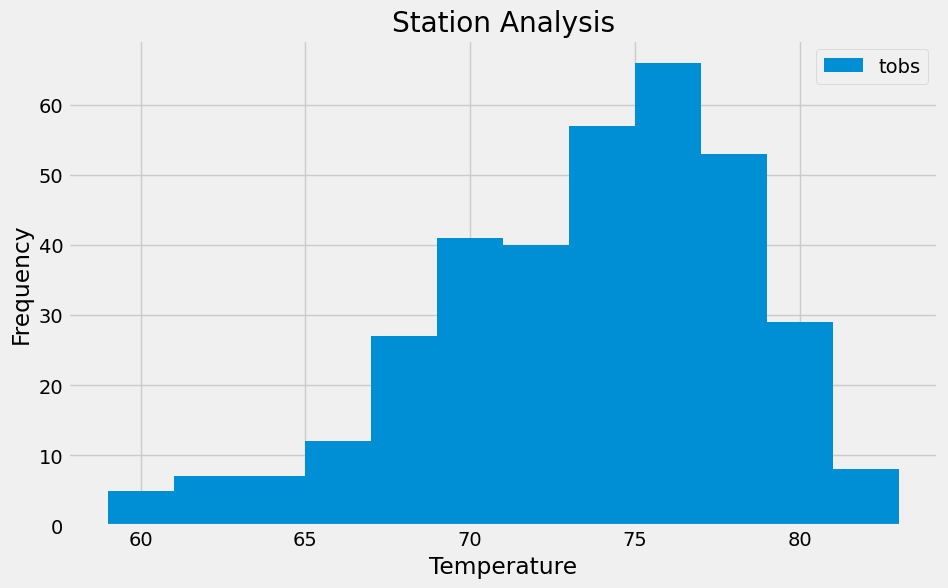

In [24]:
# plot the results as a histogram
plt.figure(figsize=(10,6))
plt.hist(station_df['tobs'], bins = 12)
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close session

In [25]:
# Close Session
session.close()